In [10]:
import surprise
import pandas as pd
import numpy as np

In [3]:
data = surprise.Dataset.load_builtin('ml-100k')

In [4]:
df = pd.DataFrame(data.raw_ratings, columns=["user","item","rate","id"])
del df["id"]
df.head(10)

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
5,298,474,4.0
6,115,265,2.0
7,253,465,5.0
8,305,451,3.0
9,6,86,3.0


In [5]:
df_table = df.set_index(["user","item"]).unstack()

In [6]:
df_table.iloc[212:222, 808:817].fillna("")

rate                                
item  211 212 213 214 215 216 217 218 219
user                                     
290     3                   4       2    
291         4       4   4           4   4
292                 3                    
293     4       3       4   4   3   2    
294                                      
295             5       5   5   4   5    
296     4                                
297     4       3       2   4       3    
298     5       3       5                
299     4   4   5           5

In [7]:
import matplotlib as mpl
import matplotlib.pylab as plt

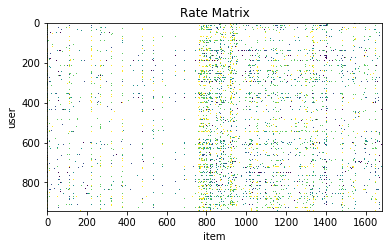

In [8]:
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

In [13]:
# 베이스라인 모형

In [11]:
from surprise.model_selection import KFold

bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}
algo = surprise.BaselineOnly(bsl_options)

np.random.seed(0)
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
acc.mean()

Estimating biases using als...
RMSE: 0.9453
Estimating biases using als...
RMSE: 0.9377
Estimating biases using als...
RMSE: 0.9500


0.9443304984013942

In [12]:
from surprise.model_selection import cross_validate

cross_validate(algo, data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.9384446 , 0.94651657, 0.93612815, 0.94221861, 0.94428787]),
 'test_mae': array([0.74477853, 0.75124267, 0.73975393, 0.745764  , 0.74659098]),
 'fit_time': (0.16913771629333496,
  0.2009885311126709,
  0.20091009140014648,
  0.21693778038024902,
  0.22814154624938965),
 'test_time': (0.3053004741668701,
  0.2245776653289795,
  0.21823525428771973,
  0.35062670707702637,
  0.21925759315490723)}

In [14]:
# Neighborhood 모형

In [15]:
sim_options = {'name': 'msd'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.97650906, 0.98346442, 0.97032533, 0.98330974, 0.9818553 ]),
 'test_mae': array([0.77163701, 0.77538984, 0.7665685 , 0.77493766, 0.77486794]),
 'fit_time': (0.5936911106109619,
  0.738088846206665,
  0.6681106090545654,
  0.6229383945465088,
  0.6095831394195557),
 'test_time': (4.285921573638916,
  4.5790276527404785,
  4.43523645401001,
  4.060789108276367,
  3.9278738498687744)}

In [16]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([1.02165374, 1.01094947, 1.01980738, 1.01184665, 1.02300541]),
 'test_mae': array([0.80651253, 0.79884201, 0.80939573, 0.79869422, 0.80983937]),
 'fit_time': (3.619810104370117,
  3.832587718963623,
  3.696192741394043,
  3.7011451721191406,
  3.7527780532836914),
 'test_time': (7.42121148109436,
  9.435868978500366,
  7.657301664352417,
  8.685514450073242,
  7.534210205078125)}

In [17]:
sim_options = {'name': 'pearson'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([1.01278354, 1.00450375, 1.0174979 , 1.01443365, 1.01270663]),
 'test_mae': array([0.80344258, 0.79499421, 0.81000706, 0.80615134, 0.8017943 ]),
 'fit_time': (4.544828653335571,
  5.277396202087402,
  4.582546710968018,
  4.618212461471558,
  4.747170448303223),
 'test_time': (8.536661624908447,
  8.944872379302979,
  7.743558883666992,
  7.591280460357666,
  7.488661050796509)}

In [18]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.99420964, 0.99381429, 1.00551851, 1.00607764, 1.00277361]),
 'test_mae': array([0.78802934, 0.78557554, 0.79468128, 0.79776647, 0.79233398]),
 'fit_time': (6.601269483566284,
  4.720431804656982,
  5.355272531509399,
  4.2725913524627686,
  4.304275274276733),
 'test_time': (8.099189281463623,
  7.444470167160034,
  7.635480165481567,
  7.463274002075195,
  7.454856872558594)}

In [19]:
sim_options = {'name': 'pearson_baseline'}
cross_validate(algo, data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.99316137, 1.00559327, 0.99815001, 1.00358822, 0.99883717]),
 'test_mae': array([0.78527354, 0.79630404, 0.78900737, 0.7934303 , 0.79185397]),
 'fit_time': (5.203038454055786,
  4.287738084793091,
  4.433189392089844,
  4.9747045040130615,
  4.355876445770264),
 'test_time': (7.6289849281311035,
  7.4881250858306885,
  9.19688105583191,
  7.546676397323608,
  8.759859085083008)}

In [20]:
# Latent Factor 모형

In [21]:
%%time
algo = surprise.SVD(n_factors=20)
print(cross_validate(algo, data))

{'test_rmse': array([0.94053016, 0.92662402, 0.93716278, 0.92936641, 0.93761243]), 'test_mae': array([0.74192097, 0.73013565, 0.73812862, 0.73550834, 0.74111338]), 'fit_time': (4.201163291931152, 4.4692957401275635, 4.664884328842163, 4.294866561889648, 4.234352111816406), 'test_time': (0.4121744632720947, 0.36506128311157227, 0.32880091667175293, 0.39189624786376953, 0.2233750820159912)}
Wall time: 25.4 s
